In [27]:
import random

import matplotlib.finance as mpf
import matplotlib.pyplot as plt
import pandas
from matplotlib.dates import date2num

df = pandas.read_csv('DAT_MT_EURUSD_M1_201710.csv',
                     names=['date', 'time', 'o', 'h', 'l', 'c', 'v'],
                     parse_dates={'datetime': ['date', 'time']},
                     )  # type DataFrame
df.index = df['datetime']
df['d'] = df.index.map(date2num)

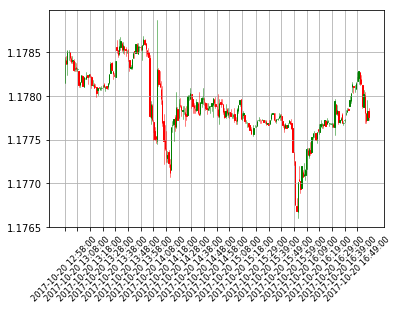

In [11]:
# df = df[-240:]
plt.grid()
plt.xticks(df['d'][::10], df.index[::10], rotation=45, size='small')
ax = plt.subplot()
# y軸のオフセット表示を無効にする。
ax.get_yaxis().get_major_formatter().set_useOffset(False)
data = df[['d', 'o', 'h', 'l', 'c']].values
# print(data)
# ローソク足は1日分の太さが1である。1日分の分足で割ってさらにその1/3の太さにする
wdth = 1.0 / (60 * 24) / 3
mpf.candlestick_ohlc(ax, data, width=wdth, colorup='g', colordown='r')
plt.show()

In [31]:
import numpy as np
from math import fabs

p_and_f = []

points = 0.0001
pips = 10

buffer = 0
for idx, data in df.iterrows():
    diff = ((data['c'] - data['o']) / (pips * points))
    buffer += diff
#     print(buffer)
    if fabs(buffer) > 1:
        if len(p_and_f) == 0:
            p_and_f.append(buffer)
        else:
            if buffer > 0 and p_and_f[-1] > 0:
                p_and_f[len(p_and_f) - 1] += buffer
            elif buffer < 0 and p_and_f[-1] < 0:
                p_and_f[len(p_and_f) - 1] += buffer
            else:
                p_and_f.append(buffer)
            # 1以下は持ち越す
            buffer = buffer % 1
            print(buffer
print(p_and_f)
        
        

0.05999999999994898
0.13999999999980695
0.04999999999988347
0.09999999999976694
0.09999999999976694
0.15999999999971593
0.19999999999975593
0.2499999999996394
0.6499999999995953
0.7999999999996898
0.7999999999996898
1.0599999999996168
0.8799999999997699
0.8599999999996388
0.3799999999998249
0.3699999999997594
0.4599999999996829
0.4899999999996574
0.4899999999996574
0.5099999999995664
0.4799999999998139
0.4799999999998139
0.5099999999997884
0.5099999999997884
0.5599999999998939
0.5599999999998939
0.5699999999997374
0.5699999999997374
0.5699999999997374
0.5699999999997374
0.9199999999998099
0.9399999999999409
1.0399999999999299
1
0.09000000000003539
0.15999999999982784
0.23999999999990784
0.20000000000008988
0.20999999999993335
0.20999999999993335
0.19000000000024642
0.19000000000024642
0.04000000000037396
0.04000000000037396
0.04000000000037396
-0.019999999999575024
3.339550858072471e-13
-0.05999999999961503
-0.5799999999994689
-0.15999999999960401
-0.31999999999976403
-0.33999999999967

-0.29999999999308713
-0.27999999999317815
-0.5899999999932106
-0.33999999999312713
-0.27999999999317815
-0.2099999999929416
-0.2299999999928506
-0.4999999999930651
-0.4899999999929996
-0.5699999999928576
-0.659999999992781
-0.499999999992621
-0.619999999992519
-0.59999999999261
-0.6099999999924535
-0.5699999999924135
-0.47999999999249
-0.5099999999922424
-0.6399999999922059
-0.7799999999922349
-0.7899999999920784
-0.7999999999921439
-0.6399999999919839
-0.6399999999919839
-0.6299999999921404
-0.5099999999922424
-0.6199999999922969
-0.7599999999923259
-0.7599999999923259
-0.7099999999922204
-0.6899999999920894
-0.6599999999918928
-0.44999999999184936
-0.3999999999919659
-0.3499999999918604
-0.2799999999918459
-0.25999999999171486
-0.16999999999179138
-0.12999999999197343
-0.2299999999919624
-0.3499999999918604
-0.3599999999919259
-0.3599999999919259
-0.36999999999176936
-0.2899999999919114
-0.23999999999202792
-0.42999999999216243
-0.6999999999921549
-0.4899999999921114
-0.6999999999921

-0.4499999999956277
-0.3899999999956787
-0.3599999999957042
-0.36999999999554767
-0.36999999999554767
-0.35999999999548216
-0.3499999999956387
-0.3299999999957297
-0.30999999999582073
-0.2199999999956752
-0.14999999999566072
-0.0999999999955552
-0.14999999999566072
-0.1399999999955952
-0.10999999999539867
-0.1299999999955297
-0.11999999999568622
-0.13999999999581725
-0.13999999999581725
-0.14999999999566072
-0.06999999999558071
-0.11999999999546418
-0.10999999999539867
-0.15999999999528214
-0.21999999999523112
-0.3599999999952601
-0.3199999999952201
-0.3199999999952201
-0.3099999999951546
-0.2699999999951146
-0.21999999999523112
-0.1699999999951256
-0.1999999999951001
-0.17999999999519112
-0.18999999999525663
-0.19999999999532214
-0.19999999999532214
-0.19999999999532214
-0.22999999999551868
-0.20999999999538765
-0.19999999999532214
-0.13999999999537316
-0.12999999999530765
-0.1999999999951001
-0.18999999999503459
-0.17999999999496907
-0.17999999999496907
-0.17999999999496907
-0.179999

-0.38999999998657486
-0.19999999998644036
-0.15999999998640035
-0.17999999998653138
-0.0899999999866079
-0.05999999998641137
-0.049999999986345856
-0.009999999986305852
0.16000000001369763
0.10000000001374865
0.12000000001387967
0.1700000000139852
0.14000000001423274
0.15000000001429825
0.16000000001414172
0.28000000001426173
0.3500000000142762
0.4100000000142252
0.49000000001408317
0.5300000000141232
0.3400000000142107
0.16000000001436376
0.030000000014400285
0.0400000000144658
0.29000000001432724
0.5100000000144362
0.4700000000146183
0.5400000000146328
0.5600000000147638
0.6600000000147528
0.7200000000147018
0.7400000000146107
0.7800000000146508
1.1000000000147487
1
0.1900000000146722
0.41000000001455916
0.12000000001443567
-0.0799999999855423
0.16000000001425363
0.20000000001429363
0.030000000014512196
0.22000000001442466
0.04000000001413362
0.15000000001418812
0.1800000000141626
0.16000000001425363
0.08000000001439567
0.22000000001442466
0.15000000001418812
0.4700000000142861
0.660

-0.9699999999902698
-0.8499999999901497
-0.8899999999901897
-0.8099999999898877
-0.7899999999899787
-0.8099999999898877
-0.7599999999900042
-0.5999999999898442
-0.5899999999897787
-0.6399999999898842
-0.6099999999896877
-0.6999999999896112
-0.7599999999897822
-0.7099999999896767
-0.5999999999896222
-0.7399999999896512
-0.6999999999896112
-0.7499999999897167
-0.6599999999897932
-0.7799999999896912
-0.4499999999897497
-0.3399999999896952
-0.4599999999895932
-0.3499999999895387
-0.5899999999893346
-0.4099999999890436
-0.3999999999892001
-0.46999999998899256
-0.5499999999888505
-0.719999999989076
-0.6899999999893236
-0.5599999999891381
-0.4999999999891891
-0.5399999999892291
-0.4699999999892146
-0.4999999999891891
-0.6099999999892436
-0.5499999999892946
-0.6799999999892581
-0.6499999999895056
-0.6299999999893746
-0.6299999999893746
-0.4899999999893456
-0.33999999998947317
-0.3499999999895387
-0.3499999999895387
-0.2499999999895497
-0.2999999999896552
-0.27999999998974623
-0.169999999989691

-0.4399999999910129
-0.48999999999111843
-0.4499999999908564
-0.4699999999909874
-0.5599999999909109
-0.5699999999907543
-0.5399999999907799
-0.31999999999067086
-0.06999999999058737
-0.08999999999049635
-0.25999999999049983
-0.21999999999045983
-0.03999999999061288
-0.029999999990547366
-0.06999999999058737
-0.07999999999065288
-0.029999999990547366
-0.04999999999067839
0.010000000009270593
0.0900000000093506
9.42712574669713e-12
-0.029999999990547366
0.05000000000953264
0.14000000000945612
0.0900000000093506
0.0500000000093106
-0.009999999990638386
0.21000000000924857
0.14000000000945612
0.14000000000945612
0.14000000000945612
0.12000000000932509
0.1300000000093906
0.08000000000950713
0.02000000000955815
9.64917035162216e-12
-0.01999999999025981
-0.12999999999009226
-0.2799999999899647
-0.1899999999898192
-0.2299999999898592
-0.24999999998976818
-0.27999999998952063
-0.28999999998958614
-0.4899999999895641
-0.5299999999896041
-0.49999999998962963
-0.44999999998974616
-0.3699999999896

-0.8599999999898742
-0.8999999999899142
-0.8299999999898997
-0.8299999999898997
-0.7699999999899507
-0.8499999999898087
-0.9299999999898887
-0.6899999999900928
-0.8699999999899397
-0.8199999999900562
-0.7599999999898852
-0.8599999999898742
-0.9099999999899797
-0.8999999999901362
-0.9099999999899797
-0.9299999999901107
-0.8199999999900562
-0.9299999999901107
-1.0399999999899432
3
0.7700000000101443
0.7700000000101443
0.6700000000101554
0.5700000000101664
0.4600000000101119
0.2100000000100284
-0.2299999999901896
-0.30999999999004757
-0.0799999999900951
-0.0799999999900951
-0.1399999999900441
-0.26999999999000757
-0.21999999998990205
-0.15999999998973102
-0.09999999998978204
-0.09999999998978204
-0.06999999998980755
0.14000000001023594
0.010000000010272458
-0.13999999998982204
0.12000000001032696
0.14000000001023594
0.11000000001026145
1.0206946399193839e-11
-0.05999999998996408
-0.02999999998998959
-0.05999999998996408
-0.15999999998995307
-0.719999999989847
-0.6699999999897415
-0.739999

1.2430945162122953e-11
-0.05999999998751804
-0.11999999998746702
-0.049999999987452526
0.05000000001253646
0.05000000001253646
0.030000000012405437
-0.07999999998764906
-0.0699999999878056
-0.11999999998791111
-0.20999999998783458
-0.16999999998779458
-0.25999999998771806
-0.23999999998780908
-0.05999999998774008
-0.1099999999878456
-0.0699999999878056
0.010000000012052368
-0.0399999999878311
-0.019999999987922124
-0.11999999998791111
-0.25999999998771806
-0.13999999998759804
-0.15999999998772907
0.0700000000122234
0.08000000001206686
0.19000000001189932
0.3100000000120193
0.12000000001210687
0.3100000000122414
0.36000000001212484
0.3000000000123979
0.2200000000123179
0.2500000000122924
0.30000000001217586
0.2700000000124234
0.2700000000124234
0.2800000000122669
0.1400000000122379
0.1500000000123034
0.060000000012157884
0.33000000001215035
0.48000000001224485
0.4700000000124014
0.6200000000124959
0.5300000000125724
0.6200000000124959
0.6100000000126524
0.5700000000123904
0.570000000012

-0.4099999999799344
-0.42999999998006544
-0.5199999999799889
-0.47999999998017095
-0.6899999999802144
-0.9299999999802324
-0.9799999999801159
-1.2299999999801994
3
0.8100000000198406
0.8400000000198151
0.9400000000198041
0.9300000000197386
0.9200000000196731
0.5400000000196261
0.6100000000196406
0.6900000000194986
0.840000000019371
0.90000000001932
0.9900000000192435
0.980000000019178
1.060000000019036
3
-0.04999999998101856
-0.09999999998090203
-0.33999999998092
-0.3699999999808945
-0.579999999980938
-0.7199999999807449
-0.6099999999806904
-0.49999999998063593
-0.6599999999805739
-0.49999999998063593
-0.45999999998059593
-0.35999999998060694
-0.29999999998065796
-0.4499999999805304
-0.27999999998052694
-0.27999999998052694
-0.45999999998059593
-0.45999999998059593
-0.40999999998071246
-0.29999999998088
-0.2899999999808145
-0.23999999998070898
-0.29999999998065796
-0.24999999998055245
-0.3399999999804759
-0.22999999998064347
-0.2499999999807745
-0.44999999998075246
-0.44999999998075246

0.02000000001566349
0.22000000001564146
0.32000000001563045
0.28000000001559044
0.31000000001556494
0.31000000001556494
0.2900000000154339
0.2800000000153684
0.3000000000152774
0.2500000000153939
0.22000000001541942
0.23000000001548493
0.23000000001548493
0.3000000000152774
0.3000000000152774
0.2600000000152374
0.20000000001551044
0.20000000001551044
0.2100000000153539
0.2100000000153539
0.20000000001551044
0.12000000001543043
0.1800000000153794
0.16000000001547043
0.15000000001540492
0.1800000000153794
0.1800000000153794
0.19000000001522288
0.22000000001541942
0.24000000001555044
0.24000000001555044
0.23000000001548493
0.09000000001545594
0.13000000001549594
0.07000000001532491
0.12000000001543043
0.1400000000153394
0.1700000000153139
0.1400000000153394
0.1600000000152484
0.1800000000153794
0.1800000000153794
0.2800000000153684
0.2500000000153939
0.2400000000153284
0.3000000000152774
0.4300000000154629
0.4300000000154629
0.4300000000154629
0.4600000000154374
0.43000000001524086
0.4000

-0.4999999999796412
-0.47999999997951015
-0.5199999999795502
-0.5099999999797067
-0.5099999999797067
-0.4999999999796412
-0.4699999999796667
-0.5299999999798377
-0.4999999999798632
-0.4999999999798632
-0.5299999999798377
-0.5699999999796557
-0.5299999999796157
-0.5499999999797467
-0.4999999999796412
-0.5099999999797067
-0.5099999999797067
-0.5099999999797067
-0.4899999999797977
-0.5799999999797212
-0.5399999999796812
-0.5199999999795502
-0.47999999997951015
-0.42999999997940463
-0.2699999999792446
-0.31999999997935014
-0.40999999997949566
-0.24999999997955769
-0.1499999999795687
-0.1499999999795687
-0.09999999997968523
-0.04999999997957971
-0.0799999999795542
-0.11999999997959421
-0.13999999997972523
-0.19999999997967421
-0.2299999999796487
-0.26999999997991075
-0.29999999997988525
-0.4099999999797177
-0.41999999997956117
-0.4399999999796922
-0.3199999999795722
-0.11999999997959421
-0.2799999999795322
-0.2199999999795832
2.0303758674344863e-11
0.03000000002027825
0.04000000002034376
0.

0.41000000002232895
0.10000000002229648
0.21000000002212893
0.21000000002212893
0.18000000002237648
0.23000000002225995
0.17000000002231097
0.09000000002223096
0.24000000002232547
0.34000000002231445
0.250000000022391
0.19000000002221995
0.21000000002235097
0.2000000000225075
0.1200000000224275
0.150000000022402
0.27000000002229996
0.12000000002220546
0.12000000002220546
-0.019999999977823535
-0.09999999997790354
-0.06999999997792905
2.2085444584263314e-11
-0.03999999997795456
0.07000000002209994
0.05000000002219096
0.010000000021928912
0.3900000000219759
0.5800000000221104
0.49000000002196487
0.5100000000220959
0.5900000000221759
0.6800000000223214
0.9200000000223394
1.3700000000221788
1
0.19000000002210982
0.30000000002194227
0.2200000000220843
0.2700000000221898
0.17000000002220084
0.06000000002236838
-0.15999999997751857
-0.05999999997752958
-0.03999999997784265
-0.08999999997772612
-0.15999999997796266
-0.3499999999778751
-0.1899999999777151
0.21000000002224084
0.04000000002223736